## Setup

In [4]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/WignerMolecule.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.6
  [780c37f4] Carlo v0.2.5
  [074ae576] CarloAnalysis v1.0.0-DEV `https://github.com/PatXue/CarloAnalysis.jl#main`
  [a93c6f00] DataFrames v1.8.0
  [e9467ef8] GLMakie v0.13.6
  [f67ccb44] HDF5 v0.17.2
  [033835bb] JLD2 v0.6.2
  [ebeed567] PeriodicArrays v0.1.0 `https://github.com/PatXue/PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.15


In [5]:
using CairoMakie
using Carlo.ResultTools
using CarloAnalysis
using DataFrames
using GLMakie
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [6]:
function generate_spins(jobname, task_no)
    fig = Figure(size=(800, 400))

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
        spins = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/spins")
        )
        spin_xs = map(v -> v[1], spins)
        spin_ys = map(v -> v[2], spins)
        spin_zs = map(v -> v[3], spins)
        Lx, Ly = size(spins)
        fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
        strength = vec(spin_zs)
        arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))

        ηs = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/etas")
        )
        η_xs = getindex.(ηs, 1)
        η_ys = getindex.(ηs, 2)
        η_zs = getindex.(ηs, 3)
        Lx, Ly = size(ηs)
        fig[1,2] = Axis(fig; title="ηs", backgroundcolor="black")
        strength = vec(η_zs)
        arrows2d!(1:Lx, 1:Ly, η_xs, η_ys, lengthscale=0.5, align=:center, color=strength,
                  colorrange=(-1, 1))
    end

    return fig
end

generate_spins (generic function with 1 method)

## AFM-FE Phase Border

In [4]:
border_results = JobResult("../jobs", "afm-fe")

JobResult("../jobs", "afm-fe", 17×23 DataFrame
 Row │ ηz                T        savefreq  _ll_sweep_time    ηxy              ⋯
     │ Measurem…         Float64  Int64     Measurem…         Measurem…        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -0.00053±0.0001     0.01       2000  0.000439±1.6e-5   0.999903±1.1e-6  ⋯
   2 │  0.00023±0.00018    0.025      2000  0.000445±1.9e-5   0.999786±2.5e-6
   3 │  0.00028±0.00028    0.05       2000  0.000434±1.2e-5   0.41±0.11
   4 │ -0.00023±0.00024    0.075      2000  0.0004348±8.5e-6  0.05994±0.00081
   5 │ -0.0002±0.00029     0.1        2000  0.0004314±9.4e-6  0.241±0.089      ⋯
   6 │ -0.00028±0.00019    0.125      2000  0.0004382±7.5e-6  0.08±0.019
   7 │  0.00018±0.00037    0.15       2000  0.000473±2.3e-5   0.06022±0.00087
   8 │  0.00011±0.00037    0.175      2000  0.0004338±8.7e-6  0.06004±0.00059
  ⋮  │        ⋮             ⋮        ⋮             ⋮                 ⋮         ⋱
  11 │  3.

In [5]:
border_results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.000439±1.6e-5,0.000123±3.7e-5
2,0.000445±1.9e-5,4.52e-5±1.5e-6
3,0.000434±1.2e-5,4.247e-5±6.1e-7
4,0.0004348±8.5e-6,4.207e-5±1.7e-7
5,0.0004314±9.4e-6,4.183e-5±1.8e-7
6,0.0004382±7.5e-6,4.304e-5±4.3e-7
7,0.000473±2.3e-5,4.71e-5±2.8e-6
8,0.0004338±8.7e-6,4.286e-5±2.7e-7
9,0.0004329±9.0e-6,4.277e-5±5.0e-7


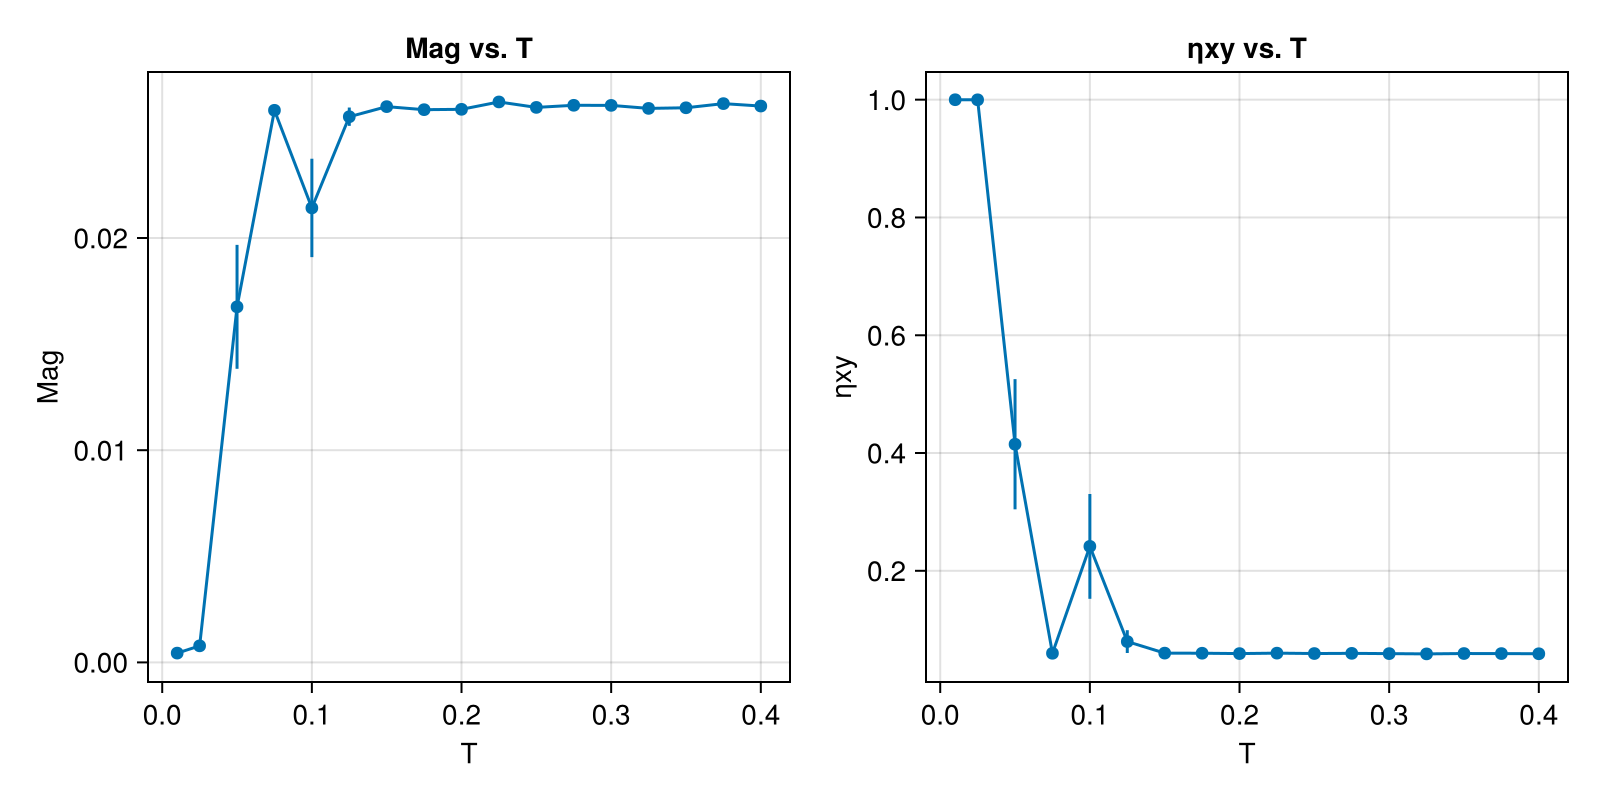

In [6]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, border_results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηxy vs. T", xlabel="T", ylabel="ηxy")
generate_plot!(ax_η, :T, :ηxy, border_results; line=true)
fig

In [7]:
border_mctimes = get_mctime_data(border_results, :Mag, :ηxy)

17-element Vector{DataFrame}:
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000271464  0.999896
   2 │ 0.000182794  0.999896
   3 │ 0.000197197  0.999896
   4 │ 0.000229268  0.999896
   5 │ 0.000293473  0.999896
   6 │ 0.000249069  0.999896
   7 │ 0.000243349  0.999896
   8 │ 0.000253358  0.999896
  ⋮  │      ⋮          ⋮
 394 │ 0.000330045  0.999902
 395 │ 0.000179694  0.999902
 396 │ 0.000252888  0.999903
 397 │ 0.000313207  0.999903
 398 │ 0.000338003  0.999904
 399 │ 0.000435715  0.999904
 400 │ 0.000489401  0.999904
             385 rows omitted
 400×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000390099  0.999771
   2 │ 0.000718606  0.999772
   3 │ 0.000845632  0.999772
   4 │ 0.000760826  0.999771
   5 │ 0.000983771  0.999771
   6 │ 0.000757555  0.999771
   7 │ 0.00055558   0.99977
   8 │ 0.000436167  0.99977
  ⋮  │      ⋮          ⋮
 394 │ 0.00

In [8]:
GLMakie.activate!()

fig = Figure()
fig[1,1] = ax = Axis(fig, title="ηxy vs. Bin #", xlabel="Bin #", ylabel="ηxy")
sg = SliderGrid(
    fig[2, 1],
    (label="Task #", range=1:17, format="{:.1f}", startvalue=1, update_while_dragging=false)
)
slider = sg.sliders[1]
mcdata = lift(slider.value) do i
    border_mctimes[i][:, :ηxy]
end
on(mcdata) do mcdata
    empty!(ax)
    lines!(ax, 1:400, mcdata)
    autolimits!(ax)
end
fig

## AFM-FE Phase Center

In [33]:
center_results = JobResult("../jobs", "afm-fe-center")

JobResult("../jobs", "afm-fe-center", 13×24 DataFrame
 Row │ ηz               T        etak_corrs                         _ll_sweep_ ⋯
     │ Measurem…        Float64  Array…                             Measurem…  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2.6e-6±5.5e-5      0.01   Complex{Measurement{Float64}}[66…  0.000408±1 ⋯
   2 │ 0.000193±9.5e-5    0.025  Complex{Measurement{Float64}}[66…  0.0003879±
   3 │ 0.0005±0.00021     0.05   Complex{Measurement{Float64}}[66…  0.0004052±
   4 │ 0.0049±0.0017      0.075  Complex{Measurement{Float64}}[27…  0.0004096±
   5 │ 0.0051±0.0016      0.1    Complex{Measurement{Float64}}[43…  0.0004256± ⋯
   6 │ 0.0052±0.0017      0.125  Complex{Measurement{Float64}}[60…  0.0004145±
   7 │ 0.0047±0.0017      0.15   Complex{Measurement{Float64}}[55…  0.0004122±
   8 │ 0.0045±0.0018      0.175  Complex{Measurement{Float64}}[60…  0.0004091±
   9 │ 0.0045±0.0017      0.2    Complex{Measurement{Float64}}[59… 

In [34]:
center_results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.000408±1.2e-5,0.000223±4.0e-5
2,0.0003879±4.8e-6,0.0001472±6.9e-6
3,0.0004052±9.7e-6,0.00016±1.2e-5
4,0.0004096±6.1e-6,0.000163±1.1e-5
5,0.0004256±6.2e-6,0.0001709±8.6e-6
6,0.0004145±4.0e-6,0.0001511±5.4e-6
7,0.0004122±3.2e-6,0.0001482±6.3e-6
8,0.0004091±2.8e-6,0.0001416±4.0e-6
9,0.000409±3.3e-6,0.0001502±7.9e-6


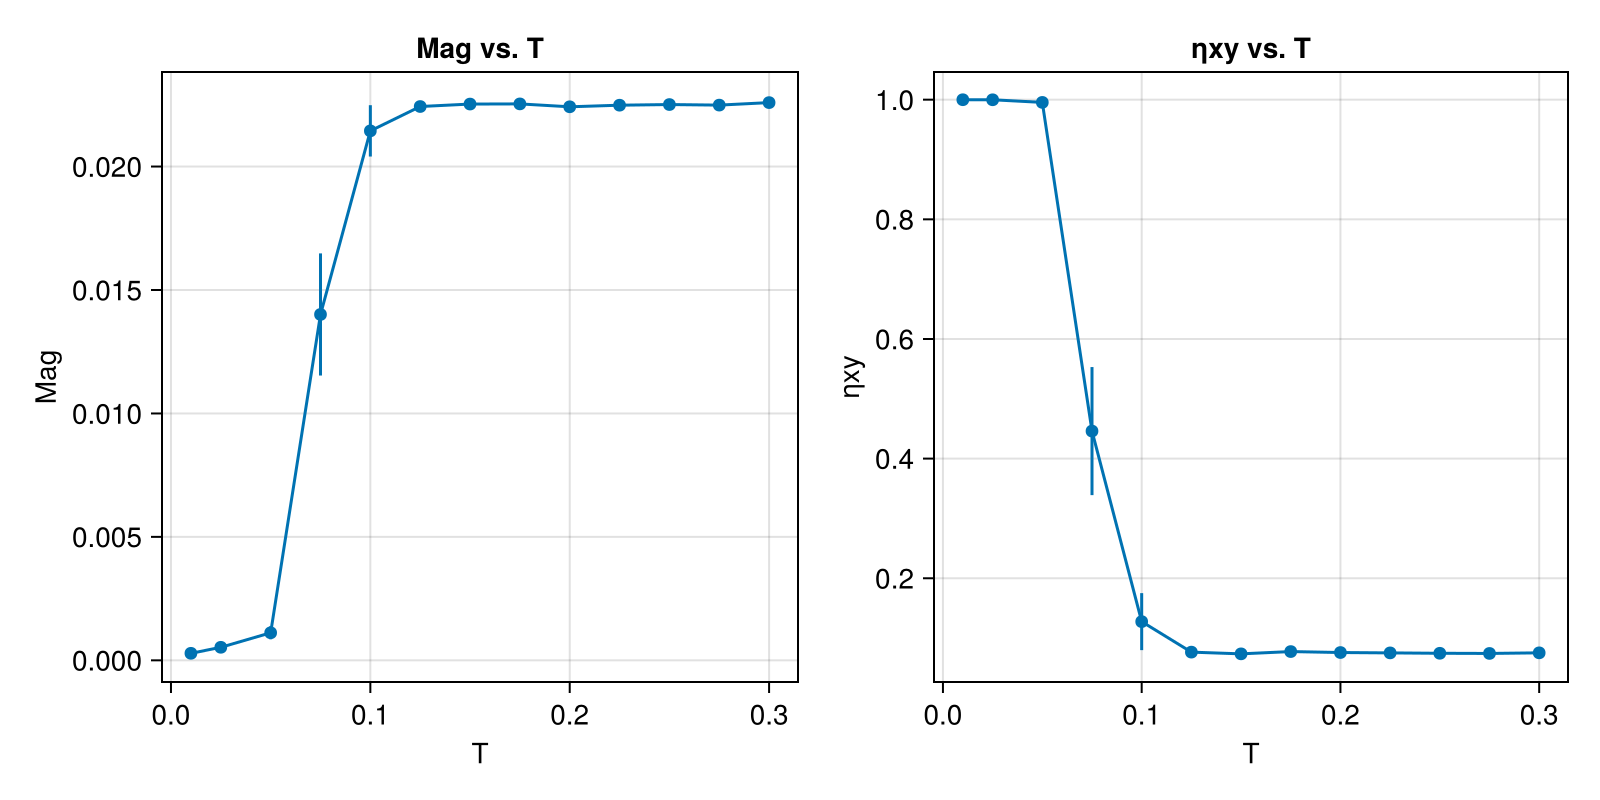

In [35]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, center_results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηxy vs. T", xlabel="T", ylabel="ηxy")
generate_plot!(ax_η, :T, :ηxy, center_results; line=true)
fig

In [36]:
center_mctimes = get_mctime_data(center_results, :Mag, :ηxy)

13-element Vector{DataFrame}:
 600×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000101422  0.999936
   2 │ 0.000103075  0.999936
   3 │ 0.000102785  0.999936
   4 │ 6.90139e-5   0.999936
   5 │ 5.67692e-5   0.999936
   6 │ 5.84821e-5   0.999936
   7 │ 5.33401e-5   0.999936
   8 │ 6.21405e-5   0.999936
  ⋮  │      ⋮          ⋮
 594 │ 0.000214016  0.999947
 595 │ 0.00019393   0.999947
 596 │ 0.000217828  0.999946
 597 │ 0.000215592  0.999946
 598 │ 0.000213152  0.999946
 599 │ 0.000233348  0.999946
 600 │ 0.000237053  0.999947
             585 rows omitted
 600×2 DataFrame
 Row │ Mag          ηxy      
     │ Float64      Float64  
─────┼───────────────────────
   1 │ 0.000278329  0.999876
   2 │ 0.000291858  0.999876
   3 │ 0.000323262  0.999876
   4 │ 0.00037634   0.999878
   5 │ 0.000480742  0.999877
   6 │ 0.000571824  0.999877
   7 │ 0.000488634  0.999877
   8 │ 0.000621363  0.999875
  ⋮  │      ⋮          ⋮
 594 │ 0.

In [ ]:
spink_corrs = center_results[:spink_corrs]

13-element Vector{Matrix{Measurements.Measurement{Float64}}}:
 [1.19e-7 ± 3.4e-8 2.68e-7 ± 4.0e-8 … 2.12e-7 ± 2.7e-8 2.68e-7 ± 4.0e-8; 1.07e-7 ± 2.0e-8 1.41e-7 ± 1.1e-8 … 2.45e-7 ± 2.8e-8 1.78e-7 ± 2.3e-8; … ; 2.1e-7 ± 2.0e-8 1.5e-7 ± 1.8e-8 … 1.54e-7 ± 2.4e-8 1.51e-7 ± 1.9e-8; 1.07e-7 ± 2.0e-8 1.78e-7 ± 2.3e-8 … 1.27e-7 ± 1.1e-8 1.41e-7 ± 1.1e-8]
 [3.68e-7 ± 9.0e-8 3.88e-7 ± 5.2e-8 … 4.11e-7 ± 5.2e-8 3.88e-7 ± 5.2e-8; 4.48e-7 ± 6.3e-8 3.73e-7 ± 3.4e-8 … 4.32e-7 ± 7.7e-8 3.48e-7 ± 6.0e-8; … ; 4.41e-7 ± 5.2e-8 4.63e-7 ± 4.7e-8 … 3.26e-7 ± 4.0e-8 3.1e-7 ± 2.8e-8; 4.48e-7 ± 6.3e-8 3.48e-7 ± 6.0e-8 … 3.97e-7 ± 5.1e-8 3.73e-7 ± 3.4e-8]
 [2.8e-6 ± 1.7e-6 2.4e-6 ± 1.2e-6 … 1.94e-6 ± 8.6e-7 2.4e-6 ± 1.2e-6; 2.6e-6 ± 1.3e-6 3.0e-6 ± 1.8e-6 … 3.1e-6 ± 1.5e-6 2.7e-6 ± 1.3e-6; … ; 2.9e-6 ± 1.6e-6 3.5e-6 ± 1.9e-6 … 3.3e-6 ± 2.0e-6 3.0e-6 ± 1.6e-6; 2.6e-6 ± 1.3e-6 2.7e-6 ± 1.3e-6 … 2.2e-6 ± 1.1e-6 3.0e-6 ± 1.8e-6]
 [0.000357 ± 6.9e-5 0.000366 ± 7.1e-5 … 0.00039 ± 7.5e-5 0.000366 ± 7.1e-5; 0.00036 ± 

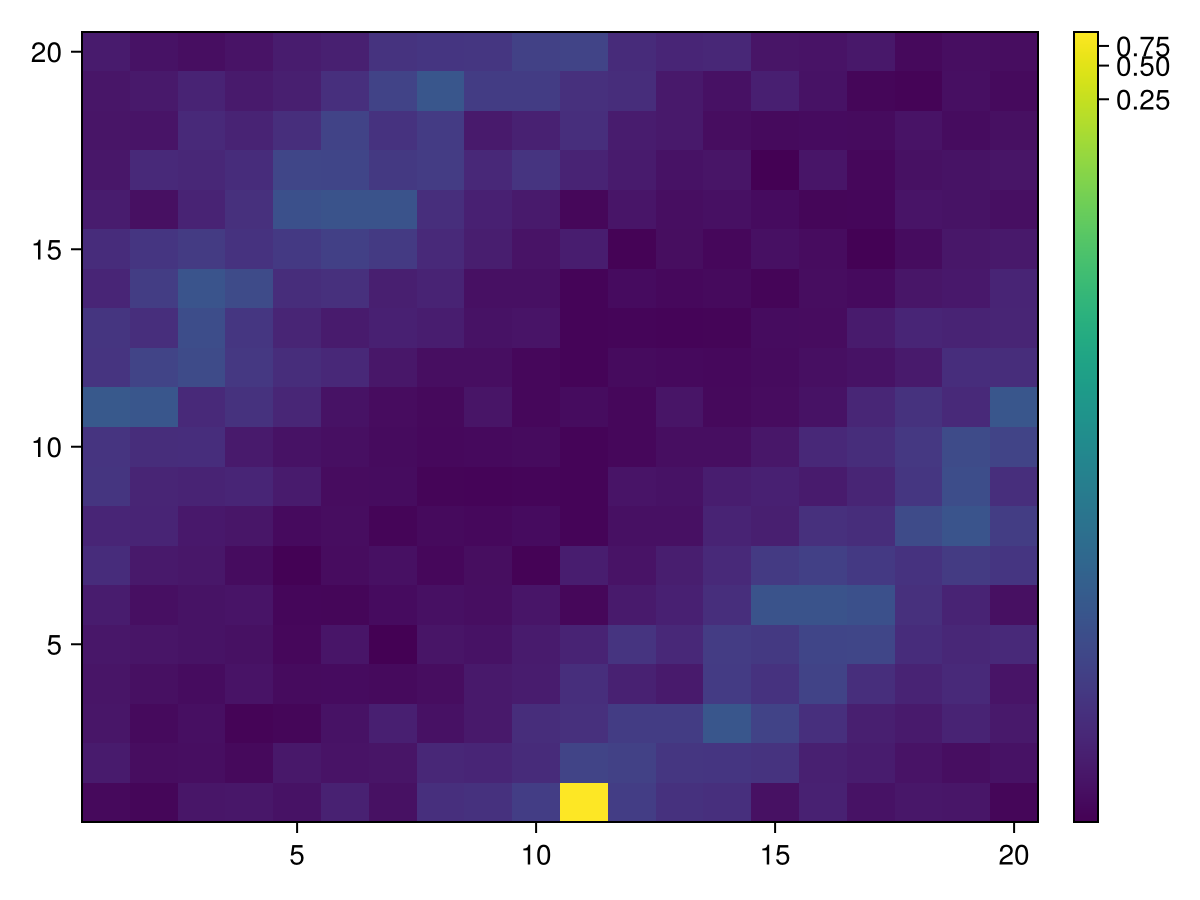

In [44]:
CairoMakie.activate!()
fig = Figure(size=(500, 500))
ax = fig[1,1] = Axis(fig; title="Spin_k")
scale = ReversibleScale(log)
fig, ax, hm = heatmap(getfield.(spink_corrs[1], :val), colorscale=scale)
Colorbar(fig[1, 2], hm)
fig

Any[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 5), (14, 7), (12, 6), (10, 5), (8, 4), (6, 3), (4, 2), (2, 1)]


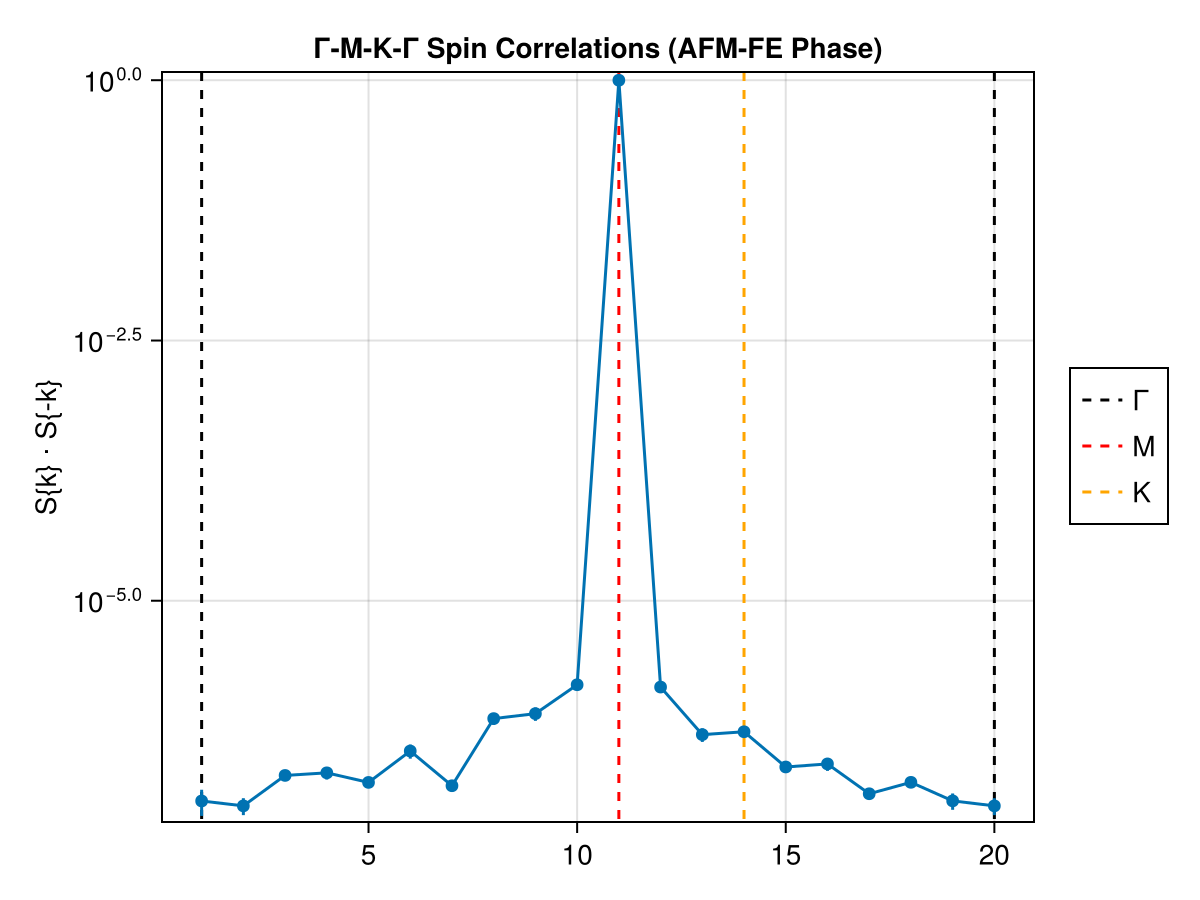

In [51]:
CairoMakie.activate!()
Lx, Ly = size(spink_corrs[1])

path = []
pos = (1, 1)
push!(path, pos)
while pos[1] < div(Lx, 2) + 1
    pos = pos .+ (1, 0)
    push!(path, pos)
end
M_pos = length(path)
while pos[2] < div(Ly, 3) + 1
    pos = pos .+ (1, 2)
    push!(path, pos)
end
K_pos = length(path)
while pos[2] > 1
    pos = pos .- (2, 1)
    push!(path, pos)
end
println(path)

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Γ-M-K-Γ Spin Correlations (AFM-FE Phase)",
    ylabel="S{k} ⋅ S{-k}",
    yscale=log10
)

min_corr = minimum(getfield.([spink_corrs[1][I...] for I in path], :val))
max_corr = maximum(getfield.([spink_corrs[1][I...] for I in path], :val))
lines!([(1, 2), (1, 1e-9)], color=:black, label="Γ", linestyle=:dash)
lines!([(M_pos, 2), (M_pos, 1e-9)], color=:red, label="M", linestyle=:dash)
lines!([(K_pos, 2), (K_pos, 1e-9)], color=:orange, label="K", linestyle=:dash)
lines!([(length(path), 2), (length(path), 1e-9)], color=:black, linestyle=:dash)

for i in [1]
    corrs = [spink_corrs[i][I...] for I in path]
    scatter!(ax, corrs)
    errorbars!(ax, 1:length(path), getfield.(corrs, :val), getfield.(corrs, :err))
    lines!(ax, corrs)
end

ylims!(ax, (0.7 * min_corr, 1.2 * max_corr))
Legend(fig[1,2], ax)
fig

## Phase Center Annealed

In [7]:
anneal_results = JobResult("../jobs", "afm-fe-anneal")

JobResult("../jobs", "afm-fe-anneal", 13×23 DataFrame
 Row │ ηz                T        init_T  etak_corrs                         _ ⋯
     │ Measurem…         Float64  Int64   Array…                             M ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  0.00039±0.00022    0.01       10  Complex{Measurement{Float64}}[62…  0 ⋯
   2 │ -0.0002±0.00024     0.025      10  Complex{Measurement{Float64}}[63…  0
   3 │ -0.00016±0.00025    0.05       10  Complex{Measurement{Float64}}[54…  0
   4 │  0.0001±0.00027     0.075      10  Complex{Measurement{Float64}}[62…  0
   5 │  0.00036±0.00031    0.1        10  Complex{Measurement{Float64}}[56…  0 ⋯
   6 │  0.00032±0.00027    0.125      10  Complex{Measurement{Float64}}[60…  0
   7 │  4.5e-5±0.00032     0.15       10  Complex{Measurement{Float64}}[58…  0
   8 │  0.00021±0.00023    0.175      10  Complex{Measurement{Float64}}[57…  0
   9 │ -0.00027±0.0003     0.2        10  Complex{Measurement{Float

In [8]:
anneal_results[[:_ll_sweep_time, :_ll_measure_time]]

Row,_ll_sweep_time,_ll_measure_time
,Measurem…,Measurem…
1,0.000421±1.9e-5,0.000216±2.3e-5
2,0.0003885±2.3e-6,0.000182±1.8e-5
3,0.0004033±5.8e-6,0.0001634±9.6e-6
4,0.000453±1.5e-5,0.000227±2.6e-5
5,0.000437±1.4e-5,0.000179±1.2e-5
6,0.000596±4.1e-5,0.000349±3.9e-5
7,0.00044±1.4e-5,0.000179±1.4e-5
8,0.000513±2.8e-5,0.000243±2.0e-5
9,0.000438±1.1e-5,0.000202±2.3e-5


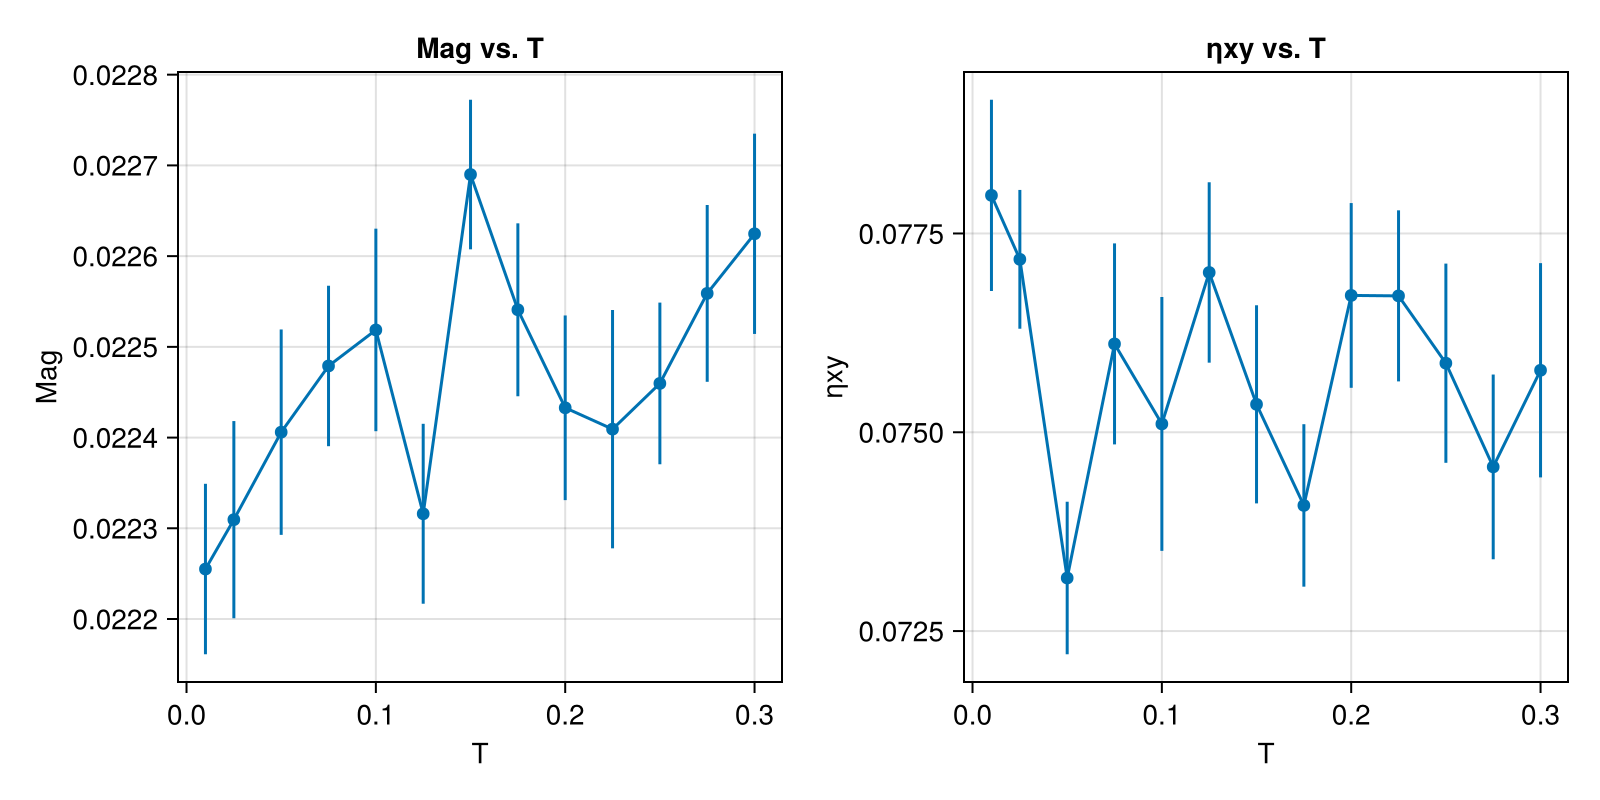

In [9]:
CairoMakie.activate!()

fig = Figure(size=(800, 400))
fig[1,1] = ax_s = Axis(fig, title="Mag vs. T", xlabel="T", ylabel="Mag")
generate_plot!(ax_s, :T, :Mag, anneal_results; line=true)
fig[1,2] = ax_η = Axis(fig, title="ηxy vs. T", xlabel="T", ylabel="ηxy")
generate_plot!(ax_η, :T, :ηxy, anneal_results; line=true)
fig

In [10]:
anneal_mctimes = get_mctime_data(anneal_results, :Mag, :ηxy)

13-element Vector{DataFrame}:
 500×2 DataFrame
 Row │ Mag        ηxy       
     │ Float64    Float64   
─────┼──────────────────────
   1 │ 0.021114   0.0757172
   2 │ 0.0250149  0.0456236
   3 │ 0.0216451  0.0685094
   4 │ 0.0219355  0.0745958
   5 │ 0.019767   0.0725102
   6 │ 0.0224885  0.0843629
   7 │ 0.0214541  0.104515
   8 │ 0.0209258  0.0647021
  ⋮  │     ⋮          ⋮
 494 │ 0.0245306  0.126486
 495 │ 0.0254841  0.0912421
 496 │ 0.0207905  0.0846739
 497 │ 0.022125   0.100476
 498 │ 0.0269356  0.0804895
 499 │ 0.0233005  0.0658388
 500 │ 0.0260671  0.0775518
            485 rows omitted
 500×2 DataFrame
 Row │ Mag        ηxy       
     │ Float64    Float64   
─────┼──────────────────────
   1 │ 0.0210167  0.0608238
   2 │ 0.022584   0.076073
   3 │ 0.0217716  0.054269
   4 │ 0.0188209  0.0345229
   5 │ 0.0221986  0.0486046
   6 │ 0.0220733  0.0690237
   7 │ 0.0207575  0.0555685
   8 │ 0.0225217  0.0291963
  ⋮  │     ⋮          ⋮
 494 │ 0.0238433  0.0849717
 495 │ 0.0239594  

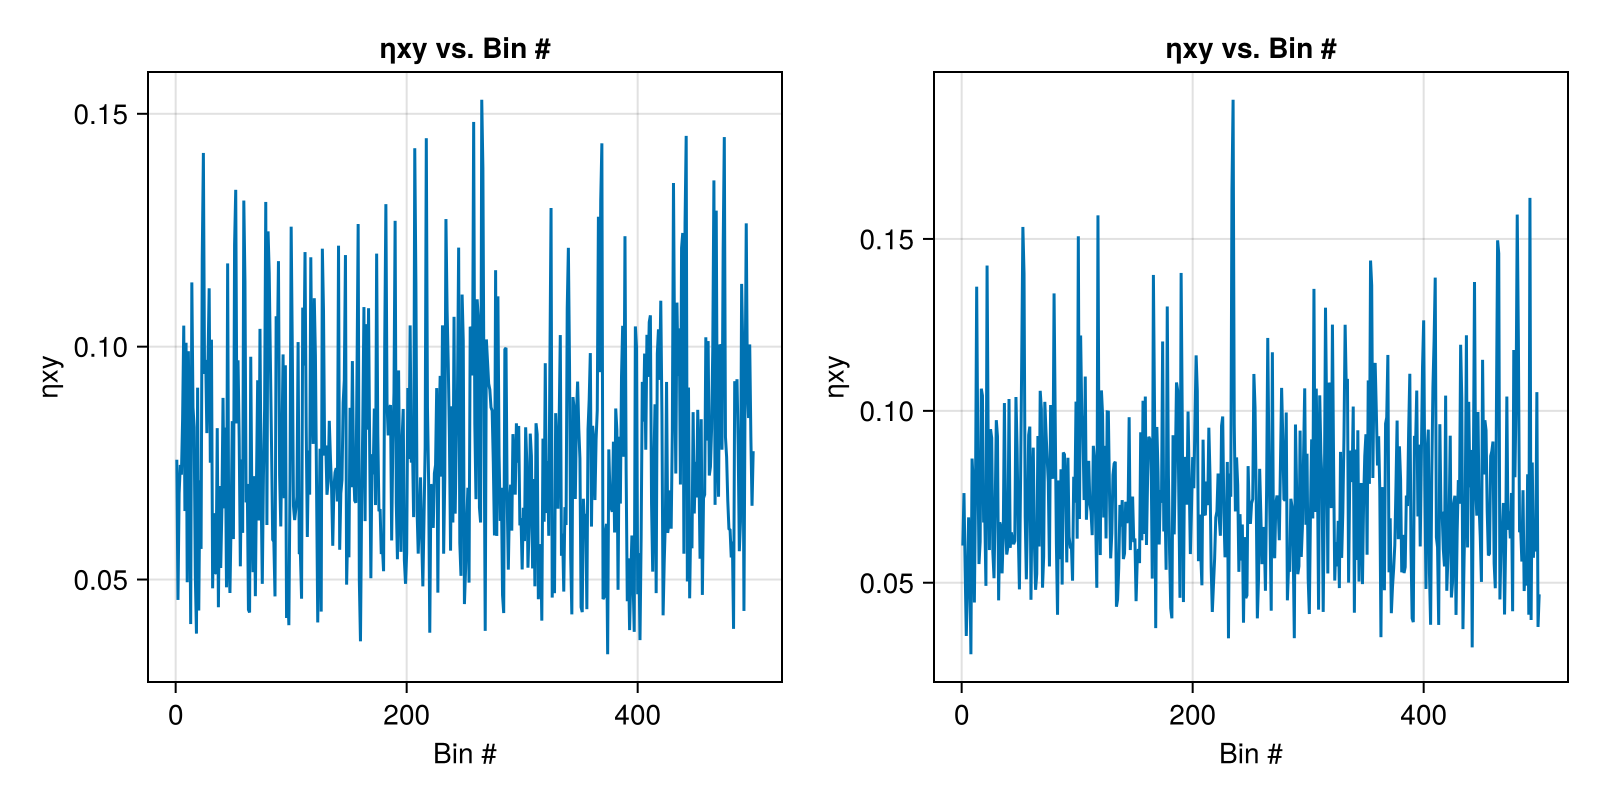

In [11]:
CairoMakie.activate!()
i = 1

fig = Figure(size=(800, 400))
fig[1,1] = ax1 = Axis(fig, title="ηxy vs. Bin #", xlabel="Bin #", ylabel="ηxy")
fig[1,2] = ax2 = Axis(fig, title="ηxy vs. Bin #", xlabel="Bin #", ylabel="ηxy")
lines!(ax1, anneal_mctimes[i][:, :ηxy])
lines!(ax2, anneal_mctimes[i+1][:, :ηxy])
fig

In [ ]:
spink_corrs = anneal_results[:spink_corrs]

13-element Vector{Matrix{Measurements.Measurement{Float64}}}:
 [0.0005836 ± 4.7e-6 0.0006062 ± 3.6e-6 … 0.0006562 ± 4.7e-6 0.0006062 ± 3.6e-6; 0.0006013 ± 4.3e-6 0.0006069 ± 3.5e-6 … 0.0006972 ± 4.0e-6 0.0006304 ± 4.1e-6; … ; 0.000654 ± 3.4e-6 0.0006964 ± 4.3e-6 … 0.0006474 ± 3.3e-6 0.000635 ± 4.1e-6; 0.0006013 ± 4.3e-6 0.0006304 ± 4.1e-6 … 0.0006323 ± 3.1e-6 0.0006069 ± 3.5e-6]
 [0.0005867 ± 5.6e-6 0.000597 ± 3.5e-6 … 0.0006532 ± 3.2e-6 0.000597 ± 3.5e-6; 0.0006089 ± 3.1e-6 0.0006069 ± 3.3e-6 … 0.0007036 ± 4.9e-6 0.0006343 ± 4.8e-6; … ; 0.0006532 ± 4.2e-6 0.0007003 ± 4.4e-6 … 0.000644 ± 3.4e-6 0.0006313 ± 3.8e-6; 0.0006089 ± 3.1e-6 0.0006343 ± 4.8e-6 … 0.0006273 ± 4.5e-6 0.0006069 ± 3.3e-6]
 [0.0005927 ± 6.0e-6 0.000607 ± 4.0e-6 … 0.0006489 ± 3.6e-6 0.000607 ± 4.0e-6; 0.0006017 ± 3.1e-6 0.0006023 ± 3.6e-6 … 0.0006943 ± 4.0e-6 0.0006306 ± 3.9e-6; … ; 0.000647 ± 4.3e-6 0.0006954 ± 2.8e-6 … 0.0006527 ± 2.9e-6 0.0006349 ± 3.4e-6; 0.0006017 ± 3.1e-6 0.0006306 ± 3.9e-6 … 0.0006323 ± 3.6e-6 

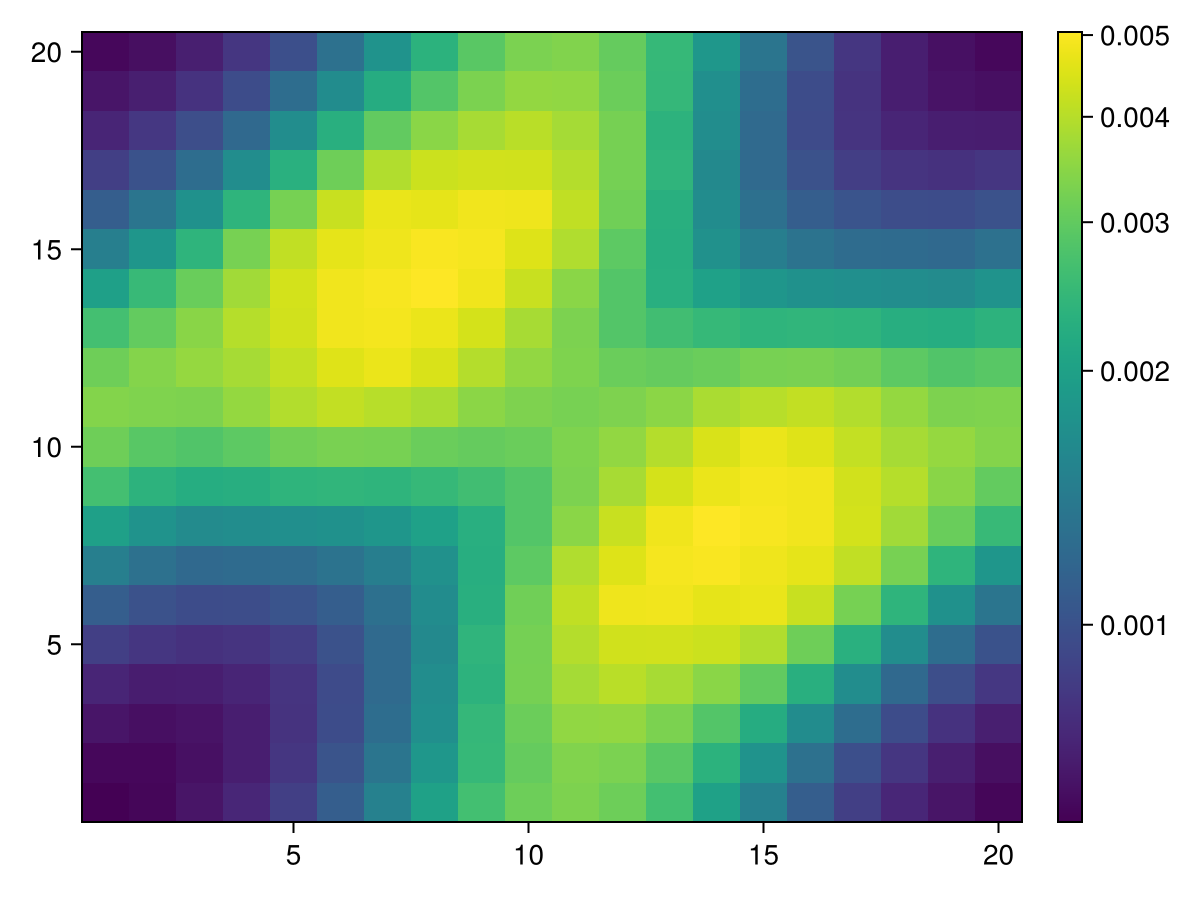

In [13]:
CairoMakie.activate!()
fig = Figure(size=(500, 500))
ax = fig[1,1] = Axis(fig; title="Spin_k")
scale = ReversibleScale(log)
fig, ax, hm = heatmap(getfield.(spink_corrs[1], :val), colorscale=scale)
Colorbar(fig[1, 2], hm)
fig

Any[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 5), (14, 7), (12, 6), (10, 5), (8, 4), (6, 3), (4, 2), (2, 1)]


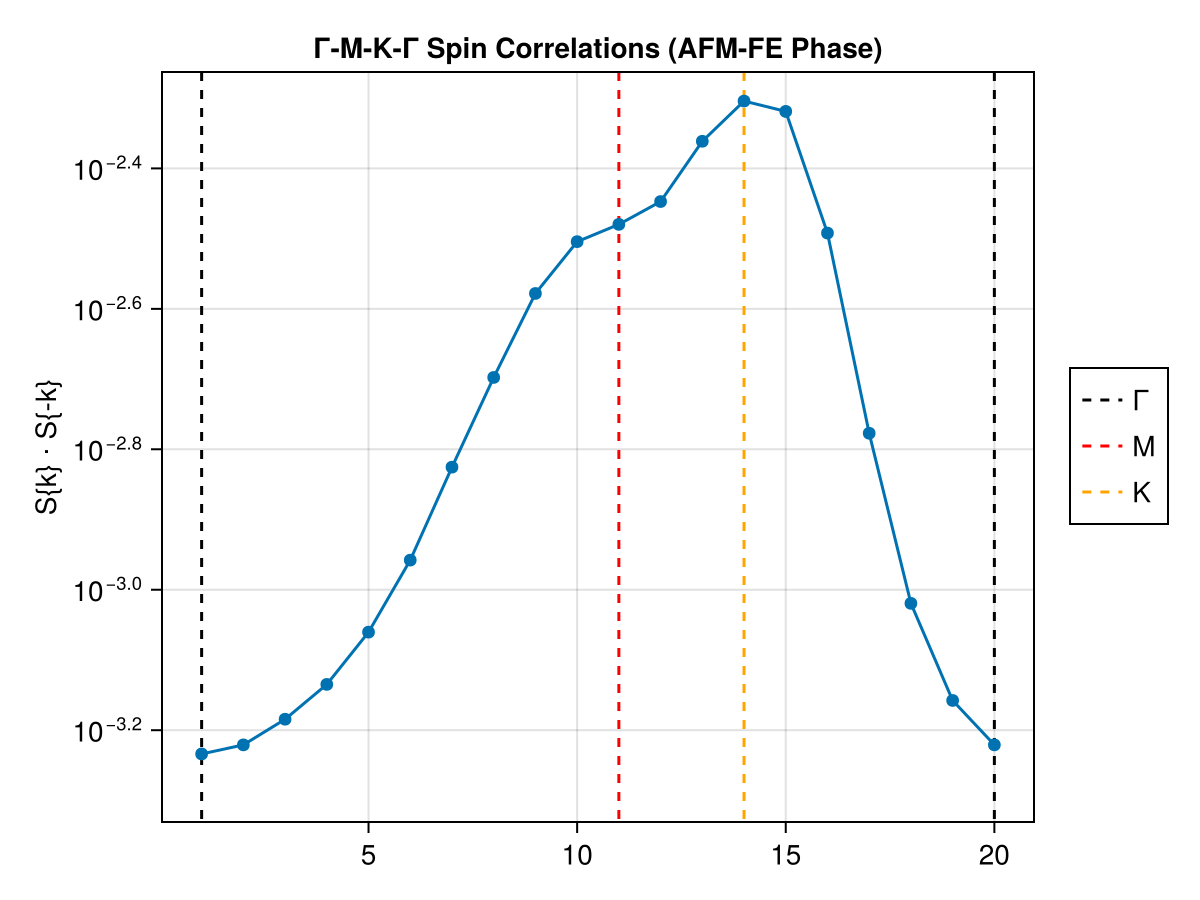

In [55]:
CairoMakie.activate!()
Lx, Ly = size(spink_corrs[1])

path = []
pos = (1, 1)
push!(path, pos)
while pos[1] < div(Lx, 2) + 1
    pos = pos .+ (1, 0)
    push!(path, pos)
end
M_pos = length(path)
while pos[2] < div(Ly, 3) + 1
    pos = pos .+ (1, 2)
    push!(path, pos)
end
K_pos = length(path)
while pos[2] > 1
    pos = pos .- (2, 1)
    push!(path, pos)
end
println(path)

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Γ-M-K-Γ Spin Correlations (AFM-FE Phase)",
    ylabel="S{k} ⋅ S{-k}",
    yscale=log10
)

min_corr = minimum(getfield.([spink_corrs[1][I...] for I in path], :val))
max_corr = maximum(getfield.([spink_corrs[1][I...] for I in path], :val))
lines!([(1, 2), (1, 1e-9)], color=:black, label="Γ", linestyle=:dash)
lines!([(M_pos, 2), (M_pos, 1e-9)], color=:red, label="M", linestyle=:dash)
lines!([(K_pos, 2), (K_pos, 1e-9)], color=:orange, label="K", linestyle=:dash)
lines!([(length(path), 2), (length(path), 1e-9)], color=:black, linestyle=:dash)

for i in [1]
    corrs = [spink_corrs[i][I...] for I in path]
    scatter!(ax, corrs)
    errorbars!(ax, 1:length(path), getfield.(corrs, :val), getfield.(corrs, :err))
    lines!(ax, corrs)
end

ylims!(ax, (0.8 * min_corr, 1.1 * max_corr))
Legend(fig[1,2], ax)
fig

Any[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (19, 10), (17, 9), (15, 8), (13, 7), (14, 6), (15, 5), (16, 4), (17, 3), (18, 2), (19, 1)]


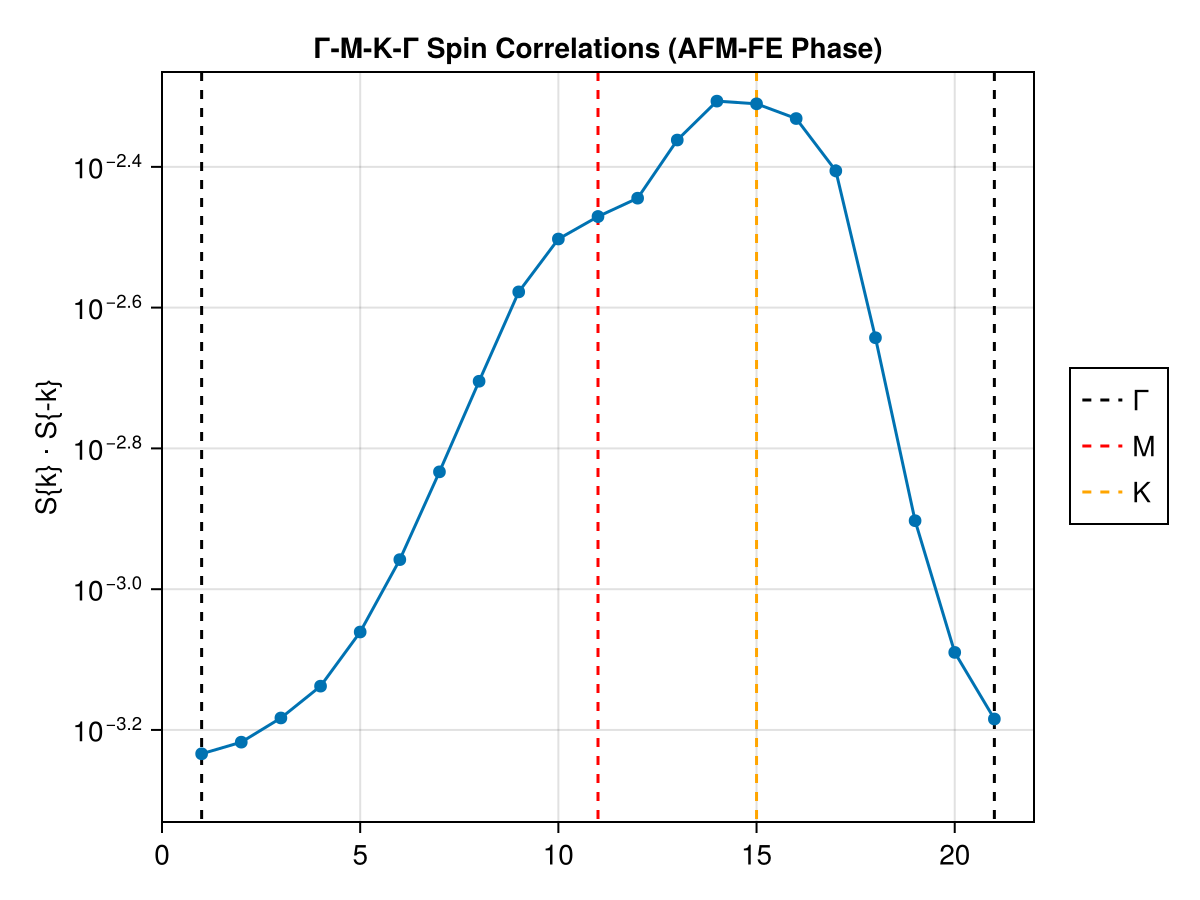

In [70]:
CairoMakie.activate!()
Lx, Ly = size(spink_corrs[1])

path = []
pos = (1, 1)
push!(path, pos)
while pos[2] < div(Ly, 2) + 1
    pos = pos .+ (0, 1)
    push!(path, mod1.(pos, (Lx, Ly)))
end
M_pos = length(path)
while pos[2] > div(Ly, 3) + 1
    pos = pos .+ (-2, -1)
    push!(path, mod1.(pos, (Lx, Ly)))
end
K_pos = length(path)
while pos[2] > 1
    pos = pos .+ (1, -1)
    push!(path, mod1.(pos, (Lx, Ly)))
end
println(path)

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Γ-M-K-Γ Spin Correlations (AFM-FE Phase)",
    ylabel="S{k} ⋅ S{-k}",
    yscale=log10
)

min_corr = minimum(getfield.([spink_corrs[1][I...] for I in path], :val))
max_corr = maximum(getfield.([spink_corrs[1][I...] for I in path], :val))
lines!([(1, 2), (1, 1e-9)], color=:black, label="Γ", linestyle=:dash)
lines!([(M_pos, 2), (M_pos, 1e-9)], color=:red, label="M", linestyle=:dash)
lines!([(K_pos, 2), (K_pos, 1e-9)], color=:orange, label="K", linestyle=:dash)
lines!([(length(path), 2), (length(path), 1e-9)], color=:black, linestyle=:dash)

for i in [1]
    corrs = [spink_corrs[i][I...] for I in path]
    scatter!(ax, corrs)
    errorbars!(ax, 1:length(path), getfield.(corrs, :val), getfield.(corrs, :err))
    lines!(ax, corrs)
end

ylims!(ax, (0.8 * min_corr, 1.1 * max_corr))
Legend(fig[1,2], ax)
fig

Any[(1, 1), (20, 20), (19, 19), (18, 18), (17, 17), (16, 16), (15, 15), (14, 14), (13, 13), (12, 12), (11, 11), (12, 10), (13, 9), (14, 8), (15, 7), (16, 9), (17, 11), (18, 13), (19, 15), (20, 17), (1, 19), (2, 1)]


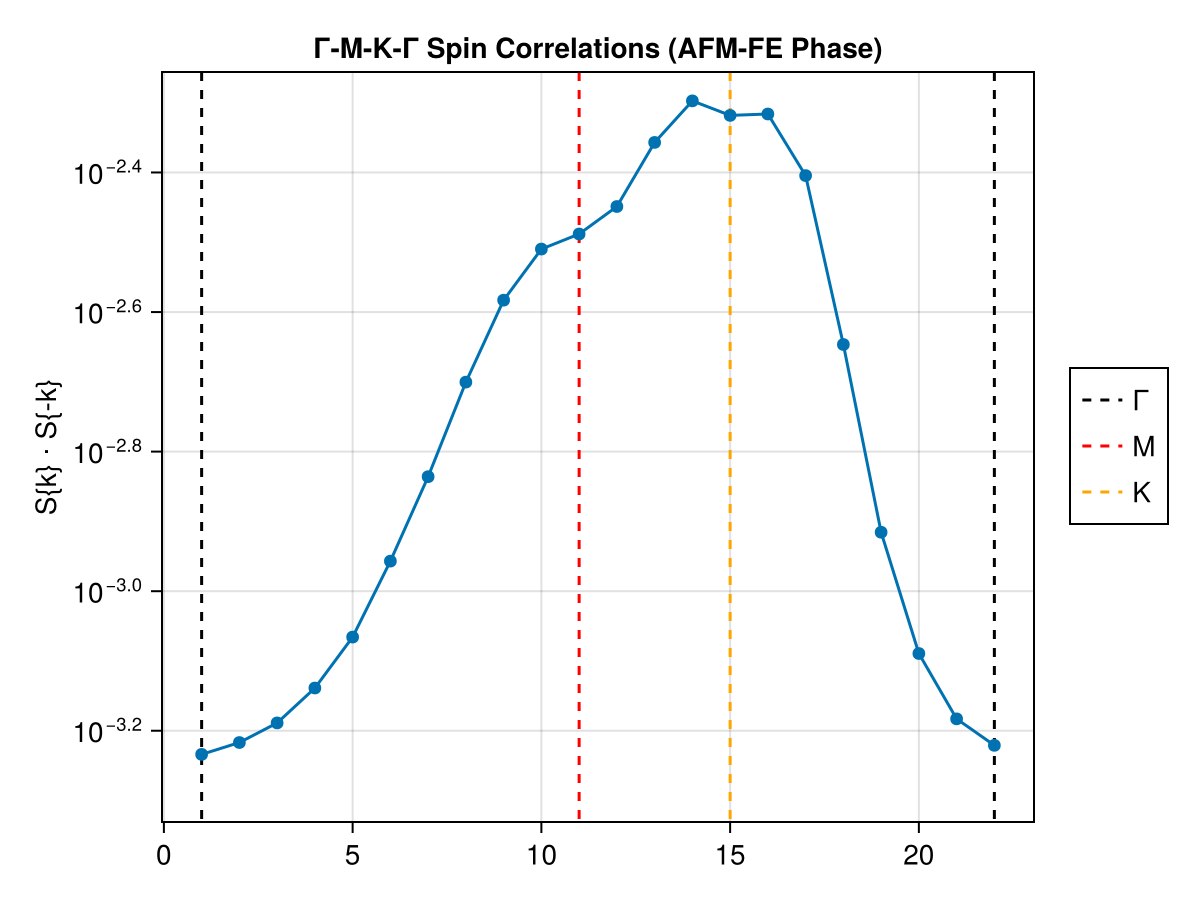

In [62]:
CairoMakie.activate!()
Lx, Ly = size(spink_corrs[1])

path = []
pos = (1, 1)
push!(path, pos)
while pos[2] > -div(Ly, 2) + 1
    pos = pos .+ (-1, -1)
    push!(path, mod1.(pos, (Lx, Ly)))
end
M_pos = length(path)
while pos[1] < -div(Lx, 3) + 1
    pos = pos .+ (1, -1)
    push!(path, mod1.(pos, (Lx, Ly)))
end
K_pos = length(path)
while pos[2] < 1
    pos = pos .+ (1, 2)
    push!(path, mod1.(pos, (Lx, Ly)))
end
println(path)

fig = Figure()
fig[1, 1] = ax = Axis(
    fig,
    title="Γ-M-K-Γ Spin Correlations (AFM-FE Phase)",
    ylabel="S{k} ⋅ S{-k}",
    yscale=log10
)

min_corr = minimum(getfield.([spink_corrs[1][I...] for I in path], :val))
max_corr = maximum(getfield.([spink_corrs[1][I...] for I in path], :val))
lines!([(1, 2), (1, 1e-9)], color=:black, label="Γ", linestyle=:dash)
lines!([(M_pos, 2), (M_pos, 1e-9)], color=:red, label="M", linestyle=:dash)
lines!([(K_pos, 2), (K_pos, 1e-9)], color=:orange, label="K", linestyle=:dash)
lines!([(length(path), 2), (length(path), 1e-9)], color=:black, linestyle=:dash)

for i in [1]
    corrs = [spink_corrs[i][I...] for I in path]
    scatter!(ax, corrs)
    errorbars!(ax, 1:length(path), getfield.(corrs, :val), getfield.(corrs, :err))
    lines!(ax, corrs)
end

ylims!(ax, (0.8 * min_corr, 1.1 * max_corr))
Legend(fig[1,2], ax)
fig

In [ ]:
etak_corrs = anneal_results[:etak_corrs]

13-element Vector{Array{Complex{Measurements.Measurement{Float64}}, 4}}:
 [0.00389 ± 0.00015 + 0.0 ± 0.0im 0.003179 ± 9.8e-5 + 0.0 ± 0.0im … 0.002454 ± 6.8e-5 + 0.0 ± 0.0im 0.003179 ± 9.8e-5 + 0.0 ± 0.0im; 0.00343 ± 0.00012 + 0.0 ± 0.0im 0.003397 ± 9.1e-5 + 0.0 ± 0.0im … 0.002062 ± 4.9e-5 + 0.0 ± 0.0im 0.002707 ± 5.7e-5 + 0.0 ± 0.0im; … ; 0.002985 ± 8.2e-5 + 0.0 ± 0.0im 0.002282 ± 5.9e-5 + 0.0 ± 0.0im … 0.002977 ± 7.7e-5 + 0.0 ± 0.0im 0.003164 ± 8.2e-5 + 0.0 ± 0.0im; 0.00343 ± 0.00012 + 0.0 ± 0.0im 0.002707 ± 5.7e-5 + 0.0 ± 0.0im … 0.002789 ± 7.1e-5 + 0.0 ± 0.0im 0.003397 ± 9.1e-5 + 0.0 ± 0.0im;;; 0.00012 ± 0.00011 + 0.0 ± 0.0im -4.3e-5 ± 9.0e-5 - 6.370696291373366e-5 ± 0.0im … -1.1e-5 ± 6.6e-5 - 3.074145187155903e-5 ± 0.0im -4.3e-5 ± 9.0e-5 + 6.370696291373366e-5 ± 0.0im; -0.000138 ± 7.5e-5 - 2.354743474498863e-5 ± 0.0im 9.3e-5 ± 0.0001 + 4.5723796516306446e-5 ± 0.0im … -0.000235 ± 4.9e-5 + 3.5551621284477124e-5 ± 0.0im -0.000281 ± 7.4e-5 + 6.549893330312348e-5 ± 0.0im; … ; -0.000277 

Maximum correlation norm: 0.00389 ± 0.00015

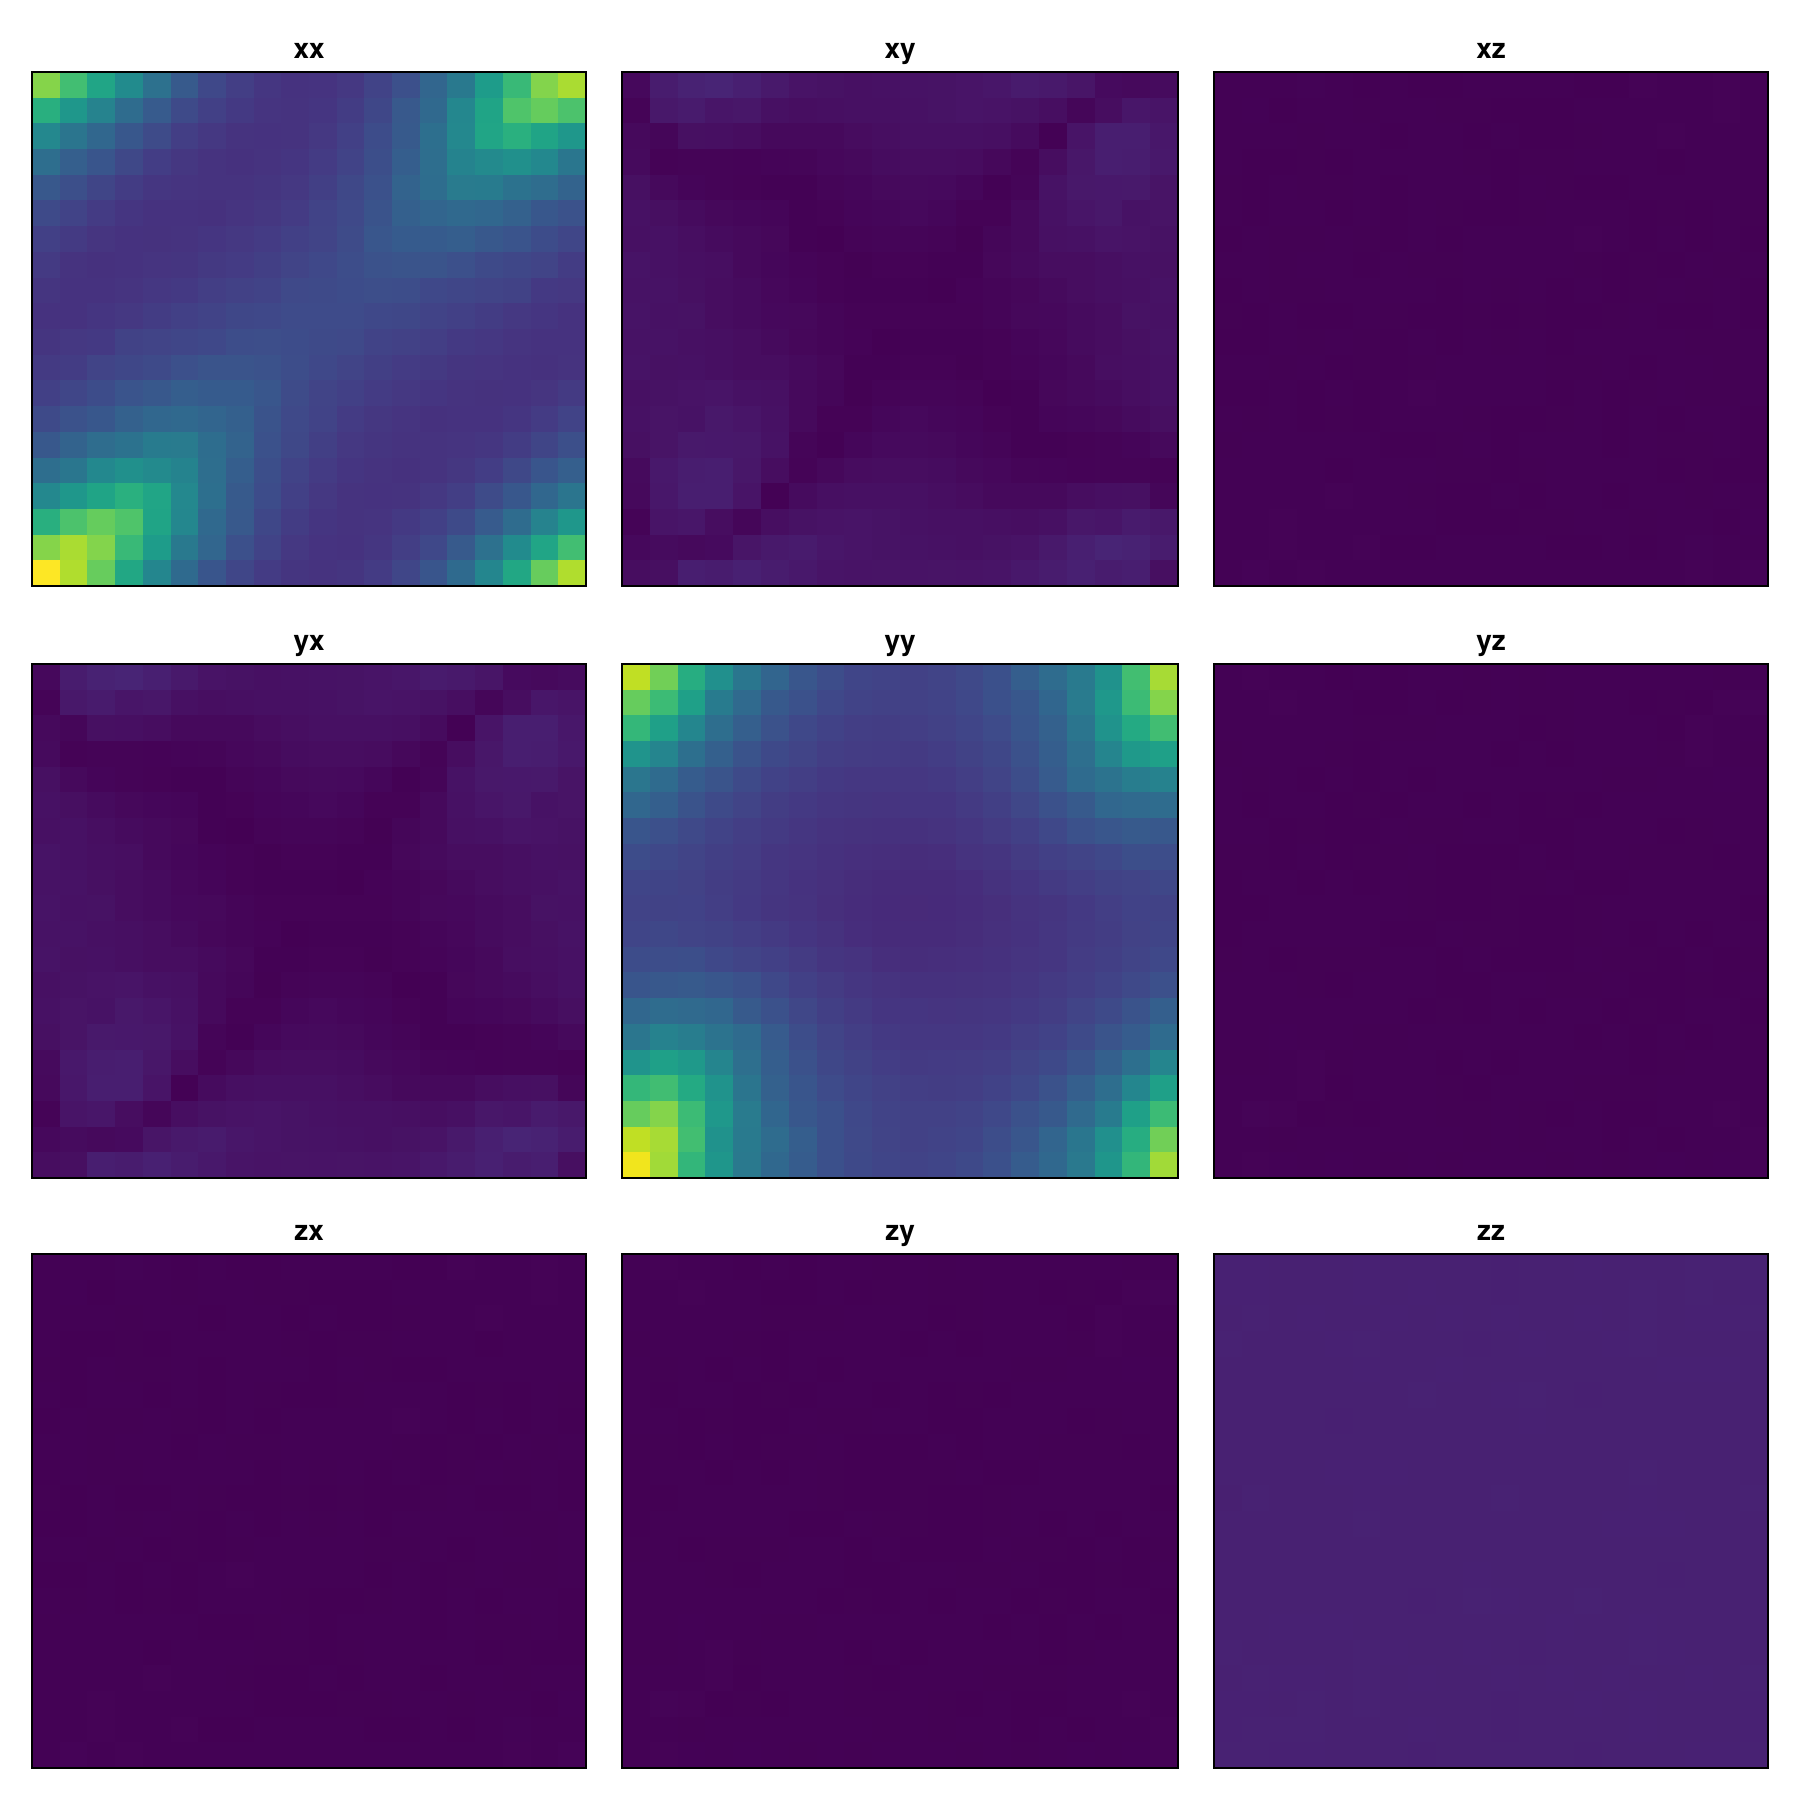

In [17]:
CairoMakie.activate!()

i = 1
fig = Figure(size=(900, 900))
labels = [:x, :y, :z]
scale = ReversibleScale(log)
corr_matrices = eachslice(etak_corrs[i], dims=(1, 2))
max_corrs = maximum(abs.(etak_corrs[i]))
min_corrs = minimum(abs.(etak_corrs[i]))
for x in 1:3
    for y in 1:3
        fig[x, y] = ax = Axis(fig, title="$(labels[x])$(labels[y])")
        corrs = getindex.(corr_matrices, x, y)
        heatmap!(ax, getfield.(abs.(corrs), :val), colorrange=(0, max_corrs.val))
        hidedecorations!(ax)
    end
end

print("Maximum correlation norm: $max_corrs")
fig